In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random
import os
from math import *

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

In [3]:
#upload files
from google.colab import files
import io


uploaded = files.upload()
df_original = pd.read_csv(io.BytesIO(uploaded['df_complete.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test_set.csv']))



Saving df_complete.csv to df_complete (2).csv
Saving test_set.csv to test_set (1).csv


In [4]:
cities = ['amsterdam', 'copenhagen', 'madrid', 'paris', 'rome', 'sofia', 'valletta', 'vienna', 'vilnius']

#calculate the mean prices for each city
mean_cities = []
for city in cities:
  #isolate the city
  rslt_df = df_original[df_original['city'] == city]
  #rslt_df['city'] =np.mean(rslt_df['price'])
  mean_cities.append(np.mean(rslt_df['price']))

city_mean = dict(zip(cities,mean_cities))

In [5]:
#city = mean of prices
def transform_original(df_original):
  new_df = df_original.copy()

  dfs = []
  for city in cities:
    rslt_df = new_df[new_df['city'] == city]
    rslt_df['city'] = city_mean[city]
    dfs.append(rslt_df)
  new_df = pd.concat(dfs)

  y = new_df['price']
  X = new_df.copy()
  X =X[['hotel_id',	'stock',	'city',	'date']]
  
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

  return X_train, X_val, y_train, y_val
  

In [8]:
def transform_test(df_test):
  X_test = df_test.copy()
  X_test = X_test[['hotel_id',	'stock',	'city',	'date']]
  dfs = []
  for city in cities:
    rslt_df = X_test[X_test['city'] == city]
    rslt_df['city'] = city_mean[city]
    dfs.append(rslt_df)
  new_df = pd.concat(dfs)
  return new_df

In [10]:
X_train, X_val, y_train, y_val = transform_original(df_original)
X_test = transform_test(df_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
'''
param=[{"n_estimators":[100, 200, 500, 1000],
        #"max_features":["sqrt", "log2"],
        #"bootstrap": [True],
        #"max_depth": [80, 100],
        #"max_features": [8, 12],
        #"min_samples_leaf": [3, 4, 5],
        #"min_samples_split": [8, 10, 12],
        }]
'''
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train) 

Y_pred_val = regressor.predict(X_val)
MAPE(y_val, Y_pred_val)

0.0303754358683681

In [ ]:
def save_prediction(Y_pred, c):
  Y_pred_test = regressor.predict(X_test)
  Y_pred_test = pd.DataFrame(Y_pred_test)
  Y_pred_test.rename(columns={'0':'price'})
  name = 'Y_pred_test_'+'c'+'.csv'
  Y_pred_test.to_csv(name)

In [22]:
Y_pred_test = regressor.predict(X_test)
Y_pred_test_11 = pd.DataFrame(Y_pred_test)
Y_pred_test_11.rename(columns={'0':'price'})
Y_pred_test_11.to_csv('Y_pred_test_11.csv')

In [21]:
X_test

,hotel_id,stock,city,date
144,30,68,164.459531,35
145,83,75,164.459531,35
146,169,38,164.459531,35
147,283,63,164.459531,35
148,482,32,164.459531,35
...,...,...,...,...
6503,488,27,110.454557,18
6504,811,34,110.454557,18
6505,935,7,110.454557,18
6506,954,20,110.454557,18


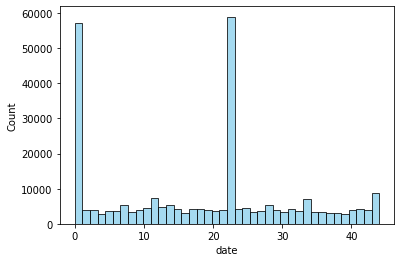

In [37]:
sns.histplot(data=df_original['date'], bins=40, color="skyblue")


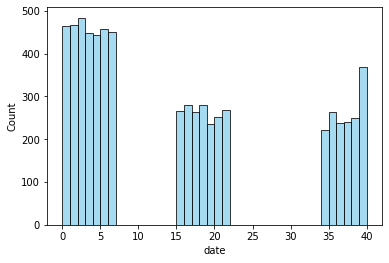

In [36]:
sns.histplot(data=df_test['date'], bins=40, color="skyblue")
#sns.kdeplot(df_test['date'], color='red')

In [ ]:
sns.countplot(data=df_original, x="city")

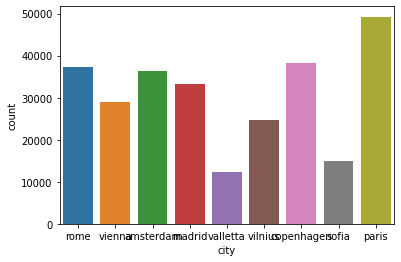

In [32]:
sns.countplot(data=df_original, x="city")

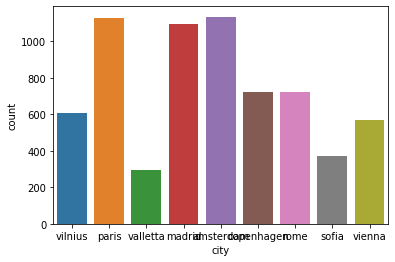

In [38]:
sns.countplot(data=df_test, x="city")

Strategy: So far we have been generating data in respect to the proportions of cities in the test set. As for other features, we have been doing the same. For dates nevertheless, we emphsized on some specific values(0, the mean, and with less consideration 44) (see barplot). In order to balance our dataset and avoid biases, we decided to focus inthe next generation on:


*   Cities : Valetta, Sofia, Vilinius
*   Dates = [0,7], [15,22], [34,40]



In [31]:
df_original.dtypes

Unnamed: 0     int64
hotel_id       int64
price          int64
stock          int64
city          object
date           int64
language      object
mobile         int64
avatar_id      int64
dtype: object